In [2]:
import analysis_tools as at
import h5py as h5
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
for filename in os.listdir('od_data'):
    at.merge_hdf5_files('od_master.h5', 'od_data/'+filename)

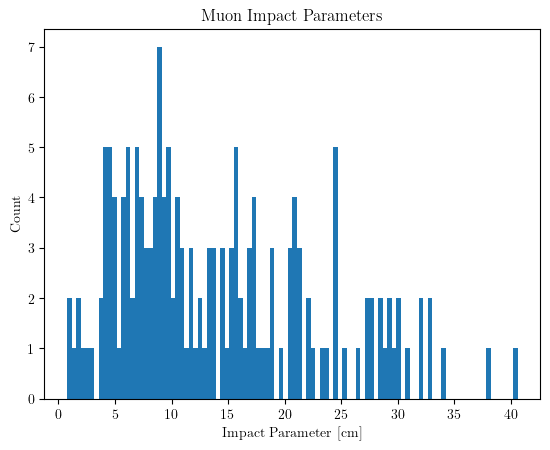

In [6]:
at.plot_impact_hist('od_master.h5', bins = 100)